In [380]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



* Контекст

Набор данных изначально получен из Национального института диабета, болезней органов пищеварения и почек. Цель состоит в том, чтобы предсказать на основе диагностических измерений, есть ли у пациента диабет.

* Признаки

   * Pregnancies: количество беременностей
   * Glucose: концентрация глюкозы в плазме через 2 часа в пероральном тесте на толерантность к глюкозе.
   * BloodPressure: диастолическое артериальное давление (мм рт. ст.)
   * SkinThickness: толщина кожной складки трицепса (мм)
   * Insulin: 2-часовой сывороточный инсулин (мЕд/мл)
   * BMI: индекс массы тела (вес в кг/(рост в м)^2)
   * DiabetesPedigreeFunction:функция родословной диабета
   * Age: возраст (лет)


* Целевая переменная (Label/Target)

   * Outcome: - 0 если диабет не диагностирован, 1 если диабет диагностирован

## Загрузка данных. Предварительный анализ

In [381]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=names)

In [382]:
#Изучим тип переменных, с которыми нам предстоит работать.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [383]:
#Посмотрим на основные статистические показатели
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [386]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Анализ и визуализация данных  

In [387]:
# количество уникальных значений Outcome.
#diabet_df_scaled['Outcome'].value_counts()
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [388]:
# распрелделение количества уникальных значений Outcome
#plt.figure(figsize=(10,4),dpi=100)
#sns.countplot(x='Outcome',data=diabet_df_scaled)

#### Корреляционный анализ

<Axes: >

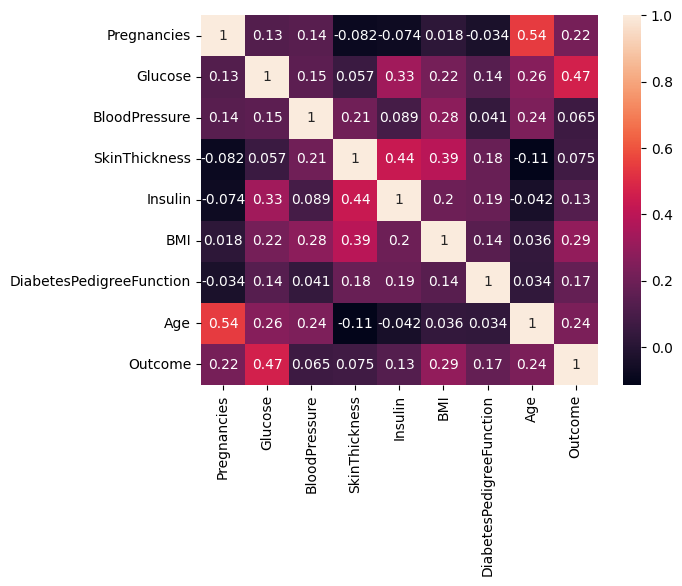

In [473]:
#построение распределения значений
sns.heatmap(data.corr(),annot=True)

In [474]:
# Вычисление попарной корреляции столбцов
corr=data.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


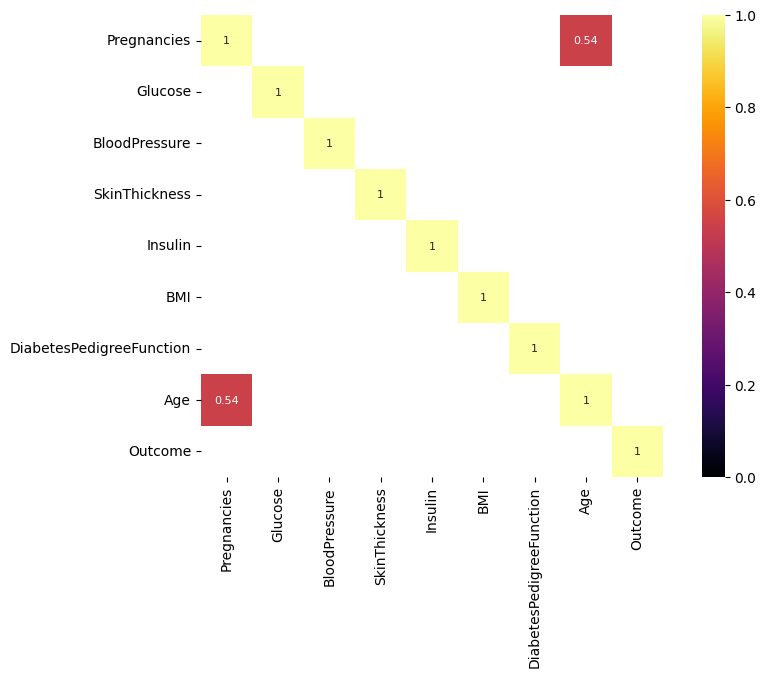

In [391]:
#Выделение тех корреляций, которые больше 0.5
plt.subplots(figsize=(10,6))
sns.heatmap(
    corr[abs(corr)>0.5],
    vmax=1.0,vmin=0.0,
    annot=True,annot_kws={'size':8},
    square=True,cmap='inferno'
)
plt.show()

In [475]:
#Удаление признака Pregnancies, так как сильно коррелирует с признаком Age
new_df=data.drop(columns='Pregnancies')

#### Исследование аномалий и выбросов

Исследование Glucose на аномалии

In [393]:
new_df['Glucose'].describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

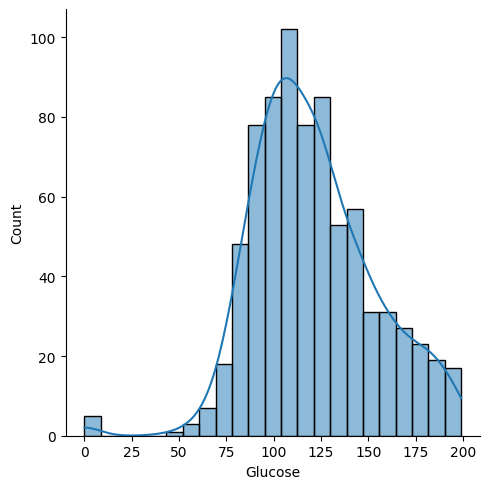

In [394]:

sns.displot(new_df['Glucose'],kde=True)

In [395]:
# Оцениваем симметричность
print(f"Skewness:{new_df['Glucose'].skew()}")
# Оцениваем наличие хвостов, чем больше тем длинее хвосты
print(f"Kurtosis:{new_df['Glucose'].kurt()}")

Skewness:0.17375350179188992
Kurtosis:0.6407798203735053


<Axes: xlabel='Outcome', ylabel='Glucose'>

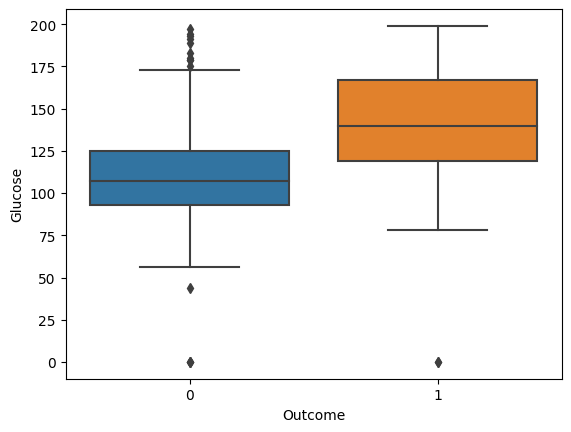

In [396]:
sns.boxplot(x='Outcome',y='Glucose',data=new_df)

In [397]:
new_df[new_df['Glucose']<40]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,0,48,20,0,24.7,0.140,22,0
182,0,74,20,23,27.7,0.299,21,0
342,0,68,35,0,32.0,0.389,22,0
349,0,80,32,0,41.0,0.346,37,1
502,0,68,41,0,39.0,0.727,41,1


In [398]:
new_df = new_df.drop (index=[342 , 349,502,182]) 





In [399]:
new_df.loc[new_df['Glucose']==0, 'Glucose'] = 79


In [400]:
new_df[new_df['Glucose']<40]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [401]:
ser = pd.Series(new_df['Glucose'])
ser.describe()

count    764.000000
mean     121.630890
std       30.554678
min       44.000000
25%       99.000000
50%      117.000000
75%      141.000000
max      199.000000
Name: Glucose, dtype: float64

<Axes: xlabel='Glucose', ylabel='Outcome'>

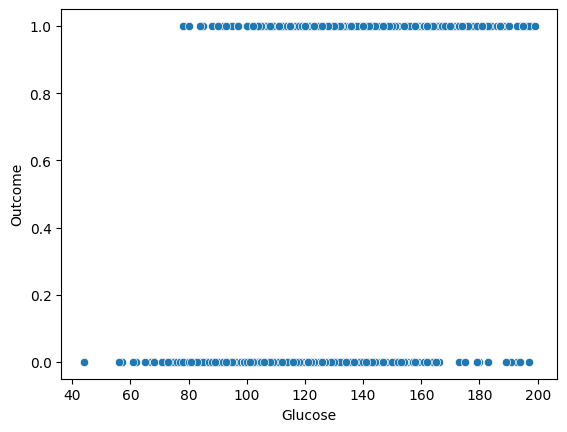

In [402]:
sns.scatterplot(x='Glucose',y='Outcome',data=new_df)

______________

Исследуем BMI на аномалии

In [403]:
# Статистические характеристики BMI
new_df['BMI'].describe()

count    764.000000
mean      31.977225
std        7.892451
min        0.000000
25%       27.300000
50%       32.000000
75%       36.525000
max       67.100000
Name: BMI, dtype: float64

<Axes: xlabel='BMI', ylabel='Outcome'>

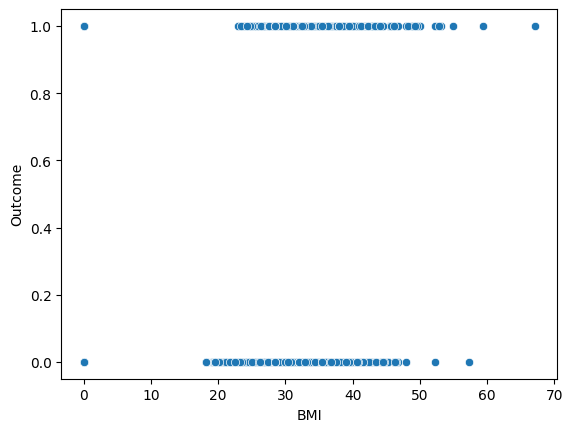

In [404]:
#Строим диаграмму рассеяния для BMI, ищем аномалии
sns.scatterplot(x='BMI',y='Outcome',data=new_df)

In [405]:
# Изучаем строки с аномальными значениями
new_df[(new_df['BMI']<16)]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,125,96,0,0,0.0,0.232,54,1
49,105,0,0,0,0.0,0.305,24,0
60,84,0,0,0,0.0,0.304,21,0
81,74,0,0,0,0.0,0.102,22,0
145,102,75,23,0,0.0,0.572,21,0
371,118,64,23,89,0.0,1.731,21,0
426,94,0,0,0,0.0,0.256,25,0
494,80,0,0,0,0.0,0.174,22,0
522,114,0,0,0,0.0,0.189,26,0
684,136,82,0,0,0.0,0.640,69,0


In [406]:
# Удаляем строки с аномальными значениями
new_df = new_df.drop (index=[49 , 522, 684 ]) 


In [407]:
#Заменяем значение BMI с нуля на нормальное значение 25
new_df.loc[new_df['BMI'] == 0, 'BMI'] = 25

<Axes: xlabel='BMI', ylabel='Outcome'>

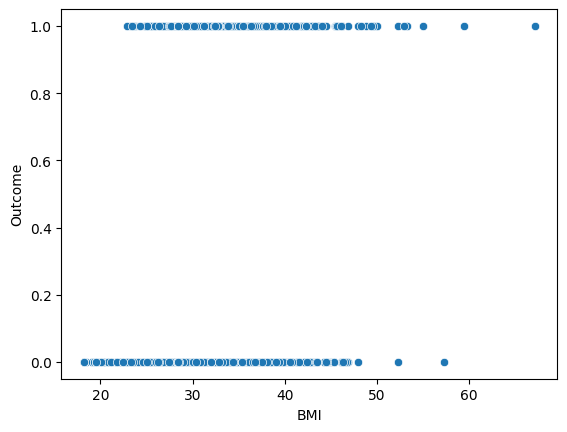

In [408]:
sns.scatterplot(x='BMI',y='Outcome',data=new_df)

<Axes: xlabel='Outcome', ylabel='BMI'>

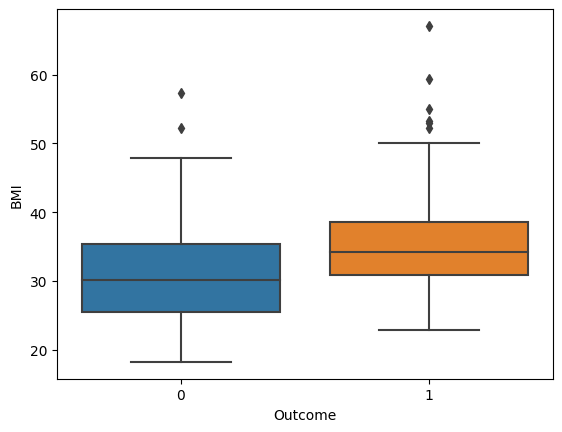

In [409]:
sns.boxplot(x='Outcome',y='BMI',data=new_df)

In [410]:
new_df[(new_df['BMI']>50)]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,162,76,56,100,53.2,0.759,25,1
125,88,30,42,99,55.0,0.496,26,1
177,129,110,46,130,67.1,0.319,26,1
193,135,0,0,0,52.3,0.578,40,1
247,165,90,33,680,52.3,0.427,23,0
303,115,98,0,0,52.9,0.209,28,1
445,180,78,63,14,59.4,2.420,25,1
673,123,100,35,240,57.3,0.880,22,0


In [411]:
new_df = new_df.drop (index=[247 ]) 


______________

Исследуем на аномалии Insulin

In [412]:
new_df['Insulin'].describe()

count    760.000000
mean      79.714474
std      113.542694
min        0.000000
25%        0.000000
50%       36.000000
75%      128.250000
max      846.000000
Name: Insulin, dtype: float64

<Axes: xlabel='Insulin', ylabel='Outcome'>

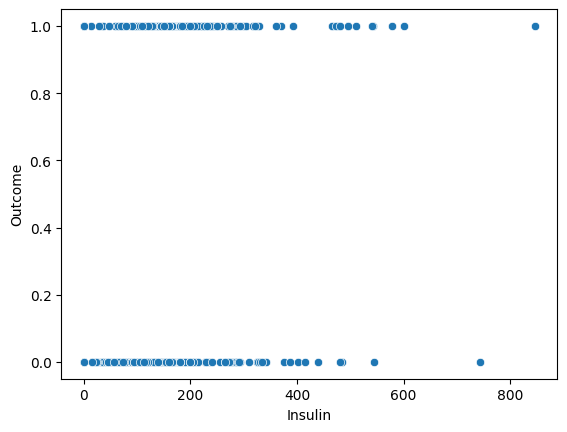

In [413]:

sns.scatterplot(x='Insulin',y='Outcome',data=new_df)

In [414]:
new_df[(new_df['Insulin']==0)]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
5,116,74,0,0,25.6,0.201,30,0
7,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...
761,170,74,31,0,44.0,0.403,43,1
762,89,62,0,0,22.5,0.142,33,0
764,122,70,27,0,36.8,0.340,27,0
766,126,60,0,0,30.1,0.349,47,1


In [415]:
new_df=new_df.drop(columns='Insulin')

In [416]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 760 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   760 non-null    int64  
 1   BloodPressure             760 non-null    int64  
 2   SkinThickness             760 non-null    int64  
 3   BMI                       760 non-null    float64
 4   DiabetesPedigreeFunction  760 non-null    float64
 5   Age                       760 non-null    int64  
 6   Outcome                   760 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 47.5 KB


__________

Исследуем на аномалии DiabetesPedigreeFunction

In [417]:
new_df['DiabetesPedigreeFunction'].describe()

count    760.000000
mean       0.472472
std        0.332563
min        0.078000
25%        0.242500
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Outcome'>

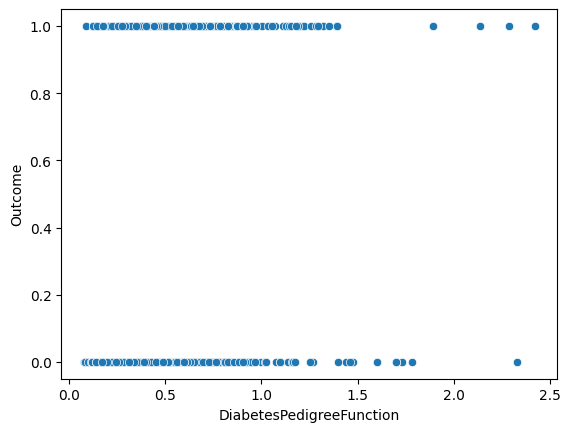

In [418]:

sns.scatterplot(x='DiabetesPedigreeFunction',y='Outcome',data=new_df)

<Axes: xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

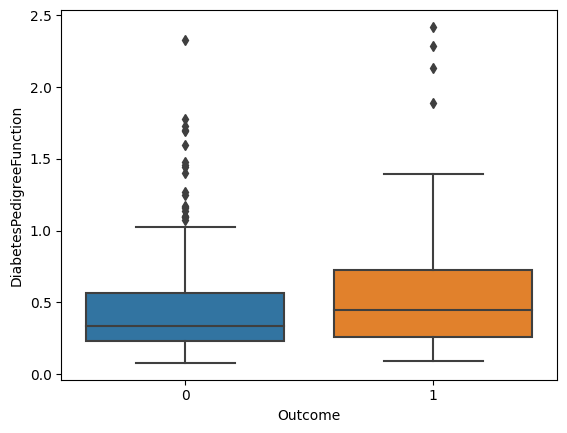

In [419]:
sns.boxplot(x='Outcome',y='DiabetesPedigreeFunction',data=new_df)

_________

Исследуем на аномалии Age

In [420]:
new_df['Age'].describe()

count    760.000000
mean      33.244737
std       11.717271
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

<Axes: xlabel='Outcome', ylabel='Age'>

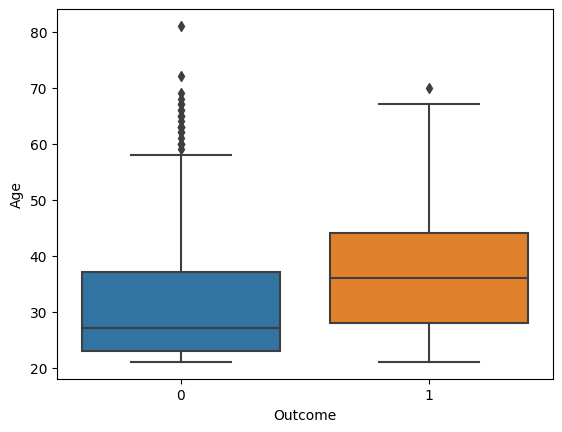

In [421]:
sns.boxplot(x='Outcome',y='Age',data=new_df)

In [422]:
new_df[(new_df['Age']>65)]

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
123,132,80,0,26.8,0.186,69,0
221,158,90,0,31.6,0.805,66,1
363,146,78,0,38.5,0.520,67,1
453,119,0,0,19.6,0.832,72,0
459,134,74,33,25.9,0.460,81,0
489,194,80,0,26.1,0.551,67,0
495,166,74,0,26.6,0.304,66,0
537,57,60,0,21.7,0.735,67,0
552,114,88,0,27.8,0.247,66,0
666,145,82,18,32.5,0.235,70,1


In [423]:
new_df = new_df.drop (index=[123,453,459,489,495]) 

_____________

Исследуем на аномалии SkinThickness


In [424]:
new_df['SkinThickness'].describe()

count    755.000000
mean      20.633113
std       15.922199
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [425]:
new_df[(new_df['SkinThickness']==0)]

,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
2,183,64,0,23.3,0.672,32,1
5,116,74,0,25.6,0.201,30,0
7,115,0,0,35.3,0.134,29,0
9,125,96,0,25.0,0.232,54,1
10,110,92,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...
757,123,72,0,36.3,0.258,52,1
758,106,76,0,37.5,0.197,26,0
759,190,92,0,35.5,0.278,66,1
762,89,62,0,22.5,0.142,33,0


In [426]:
new_df=new_df.drop(columns='SkinThickness')

In [427]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 755 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   755 non-null    int64  
 1   BloodPressure             755 non-null    int64  
 2   BMI                       755 non-null    float64
 3   DiabetesPedigreeFunction  755 non-null    float64
 4   Age                       755 non-null    int64  
 5   Outcome                   755 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.3 KB


## Обучение и оценка качества модели

Отбор и выделение признаков

In [428]:
X=new_df.drop('Outcome',axis=1)
y=new_df['Outcome']

Разделение на обучающую и тестовую выборки

In [429]:
# импортируем необходимый модуль
from sklearn.model_selection import train_test_split


In [430]:
 
# размер тестовой выборки составит 10%
# также зададим точку отсчета для воспроизводимости результата
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Приведение независимых переменных к единому масштабу

In [431]:
 
# импортируем необходимый класс из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler
 
# создадим объект этого класса
scaler = StandardScaler()
 
# приведем данные к единому масштабу 
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)


Обучение модели и прогноз

In [432]:
# импортируем логистическую регрессию из модуля linear_model библиотеки sklearn
from sklearn.linear_model import LogisticRegression

In [433]:

 
# создадим объект этого класса и запишем его в переменную model
log_model = LogisticRegression()
 
# обучим нашу модель
log_model.fit(scaled_X_train, y_train)
 
# выполним предсказание класса на тестовой выборке
#y_pred = log_model.predict(X_test)



LogisticRegression()

### Интерпретация коэффициентов

In [451]:
new_df.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,33.6,0.627,50,1
1,85,66,26.6,0.351,31,0
2,183,64,23.3,0.672,32,1
3,89,66,28.1,0.167,21,0
4,137,40,43.1,2.288,33,1


In [434]:
#выводим коэффициенты
log_model.coef_

array([[ 1.16677515, -0.26832989,  0.60993864,  0.31587752,  0.56524863]])

In [435]:
#экспонируем каждый коэффициент
np.exp(log_model.coef_[0])

array([3.21161892, 0.76465549, 1.84031848, 1.37146227, 1.75988529])

Интерпретация:
* Мы можем ожидать, что **шансы (odds)** заболеть диабетом **уменьшаются** (исходный коэффициент был отрицательный) при увеличении "давления" на единицу.
* Мы можем ожидать, что **шансы (odds)** заболеть диабетом **увеличиваются** (исходный коэффициент был положительный) при увеличении признака "глюкозы" или "индекса массы тела" или "возраста" или "функция родословного диабета" на единицу.
* Сравнивая значения odds ration между собой, мы видим, что признак glicose обладает более сильной способностью влиять на предсказание, чем остальные признаки.

## Точность модели на задачах классификации

In [436]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [437]:
y_pred = log_model.predict(scaled_X_test)

In [452]:
# метрика Accuracy=74%
accuracy_score(y_test,y_pred)

0.748898678414097

In [453]:
#создаем матрицу ошибок
confusion_matrix(y_test,y_pred)

array([[124,  21],
       [ 36,  46]], dtype=int64)

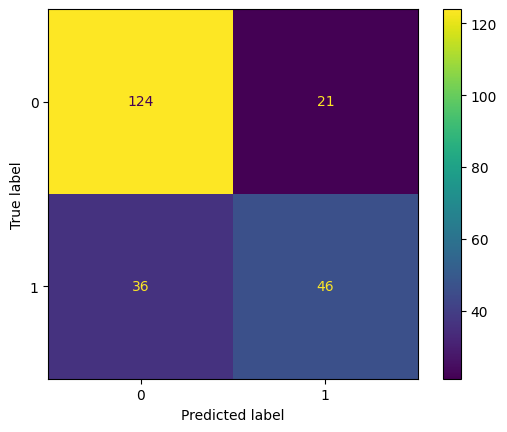

In [454]:
#визуализируем матрицу ошибок
disp=ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test)

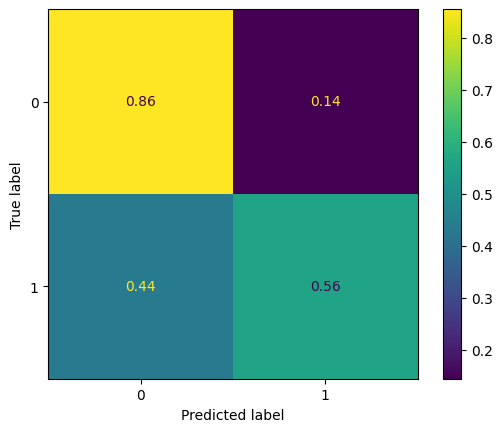

In [456]:
# Масштабированные данные: максимальное значение = 1
disp=ConfusionMatrixDisplay.from_estimator(log_model,scaled_X_test,y_test,normalize='true')

In [442]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.81       145
           1       0.69      0.56      0.62        82

    accuracy                           0.75       227
   macro avg       0.73      0.71      0.72       227
weighted avg       0.74      0.75      0.74       227



In [457]:
from sklearn.metrics import precision_score, recall_score

In [458]:
#Значение precision на всем наборе данных
precision_score(y_test,y_pred)

0.6865671641791045

In [460]:
#Значение recall на всем наборе данных
recall_score(y_test,y_pred)

0.5609756097560976

In [463]:
# 96% вероятность класса 0
# 100% вероятность класса 1
log_model.predict_proba(scaled_X_test)[0]

array([0.9666035, 0.0333965])

In [465]:
log_model.predict(scaled_X_test)[0]

0

## Изучаем график и область под графиком

In [466]:
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay,plo)

In [467]:
y_score = log_model.decision_function(X_test)

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [449]:
y_score.shape

(227,)

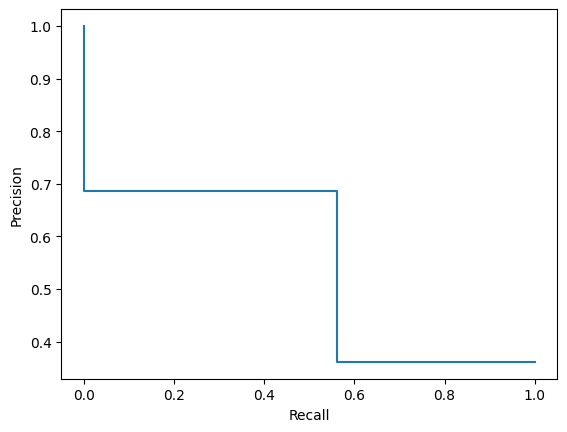

In [468]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

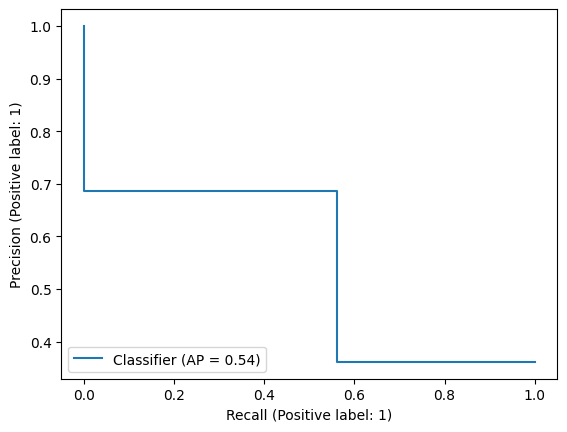

In [470]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)

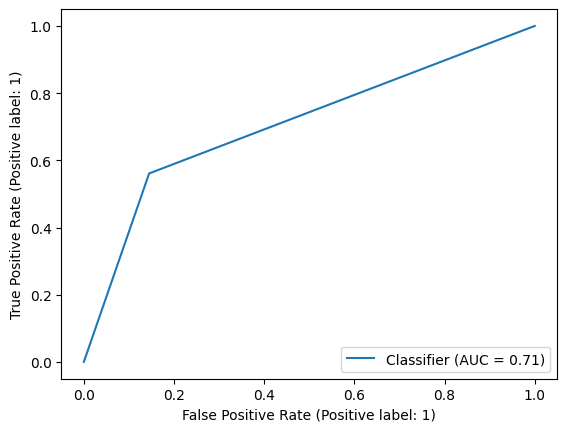

In [472]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)